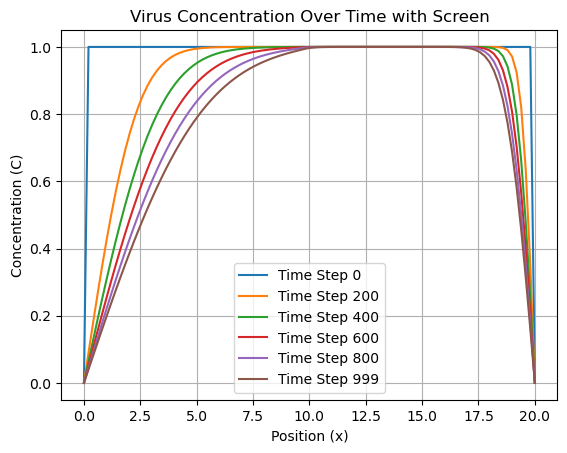

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
L = 20.0          # Length of the room
T = 10.0          # Total simulation time
Nx = 100          # Number of spatial grid points
Nt = 1000         # Number of time steps
D1 = 0.8          # Diffusivity in open air
D2 = 0.05         # Reduced diffusivity behind the screen
x_screen = 10.0   # Location of the screen
c0 = 1.0          # Initial concentration
c_boundary = 0.0 # Concentration at the boundaries

# Discretization
dx = L / (Nx - 1)
dt = T / Nt

# Initialize concentration matrix
C = np.zeros((Nx, Nt))

# Set initial condition
C[:, 0] = c0

# Apply boundary conditions
C[0, :] = c_boundary
C[-1, :] = c_boundary

# Perform the numerical simulation
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        # Apply the 1D diffusion equation with varying diffusivity
        if i < int(x_screen / dx):
            C[i, n+1] = C[i, n] + D1 * dt / dx**2 * (C[i+1, n] - 2 * C[i, n] + C[i-1, n])
        else:
            C[i, n+1] = C[i, n] + D2 * dt / dx**2 * (C[i+1, n] - 2 * C[i, n] + C[i-1, n])

# Plot the concentration profile at different time steps
time_steps_to_plot = [0, 200, 400, 600, 800, Nt - 1]

for n in time_steps_to_plot:
    plt.plot(np.linspace(0, L, Nx), C[:, n], label=f'Time Step {n}')

plt.xlabel('Position (x)')
plt.ylabel('Concentration (C)')
plt.title('Virus Concentration Over Time with Screen')
plt.legend()
plt.grid(True)
plt.show()
